In [1]:
# manage data and fit
import pandas as pd
import numpy as np

# first part with least squares
from scipy.optimize import curve_fit

# second part about ODR
from scipy.odr import ODR, Model, Data, RealData

# style and notebook integration of the plots
import seaborn as sns
%matplotlib inline 
sns.set(style="whitegrid", font_scale=2)

from math import sqrt,pi,exp

In [2]:
df = pd.read_csv(
    "2018-11 JMT Li-rich NMC Pristine-csp-22112018.TXT", 
    sep="\t",
    skiprows=3,
)

In [3]:
df

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,KE_LiM3p_s MRSof/23,BE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
0,1390.79,95.9,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
1,1390.89,95.8,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
2,1390.99,95.7,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
3,1391.09,95.6,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
4,1391.19,95.5,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1443.39,43.3,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
527,1443.49,43.2,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
528,1443.59,43.1,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525
529,1443.69,43.0,63.25,63.25,63.2520,63.25,63.25,63.25,63.25,63.25,63.25,63.25,63.250,63.25,63.25,63.25,63.2520


In [4]:
ddf = df.set_index("BE_LiM3p_s MRSof/23")
ddf

,KE_LiM3p_s MRSof/23,CPS_LiM3p_s MRSof/23,Mn 3p_1_LiM3p_s MRSof/23,Mn 3p_2_LiM3p_s MRSof/23,Li 1s_3_LiM3p_s MRSof/23,Co 3p_4_LiM3p_s MRSof/23,Co 3p + Na2s_5_LiM3p_s MRSof/23,Ni 3p_6_LiM3p_s MRSof/23,Ni 3p_7_LiM3p_s MRSof/23,Ni 3p_8_LiM3p_s MRSof/23,Mn 3s_9_LiM3p_s MRSof/23,Mn 3s_10_LiM3p_s MRSof/23,Li 1s7_11_LiM3p_s MRSof/23,Ni 3p_12_LiM3p_s MRSof/23,Background_LiM3p_s MRSof/23,Envelope_LiM3p_s MRSof/23
BE_LiM3p_s MRSof/23,,,,,,,,,,,,,,,,
95.9,1390.79,175.30,175.30,175.3000,175.30,175.30,175.30,175.30,175.30,175.30,175.30,175.318,175.30,175.30,175.30,175.3180
95.8,1390.89,175.90,175.90,175.9000,175.90,175.90,175.90,175.90,175.90,175.90,175.90,175.922,175.90,175.90,175.90,175.9220
95.7,1390.99,180.85,180.85,180.8500,180.85,180.85,180.85,180.85,180.85,180.85,180.85,180.876,180.85,180.85,180.85,180.8760
95.6,1391.09,180.75,180.75,180.7500,180.75,180.75,180.75,180.75,180.75,180.75,180.75,180.781,180.75,180.75,180.75,180.7810
95.5,1391.19,178.35,178.35,178.3500,178.35,178.35,178.35,178.35,178.35,178.35,178.35,178.388,178.35,178.35,178.35,178.3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.3,1443.39,60.40,60.40,60.4040,60.40,60.40,60.40,60.40,60.40,60.40,60.40,60.400,60.40,60.40,60.40,60.4040
43.2,1443.49,61.20,61.20,61.2032,61.20,61.20,61.20,61.20,61.20,61.20,61.20,61.200,61.20,61.20,61.20,61.2032
43.1,1443.59,62.65,62.65,62.6525,62.65,62.65,62.65,62.65,62.65,62.65,62.65,62.650,62.65,62.65,62.65,62.6525


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

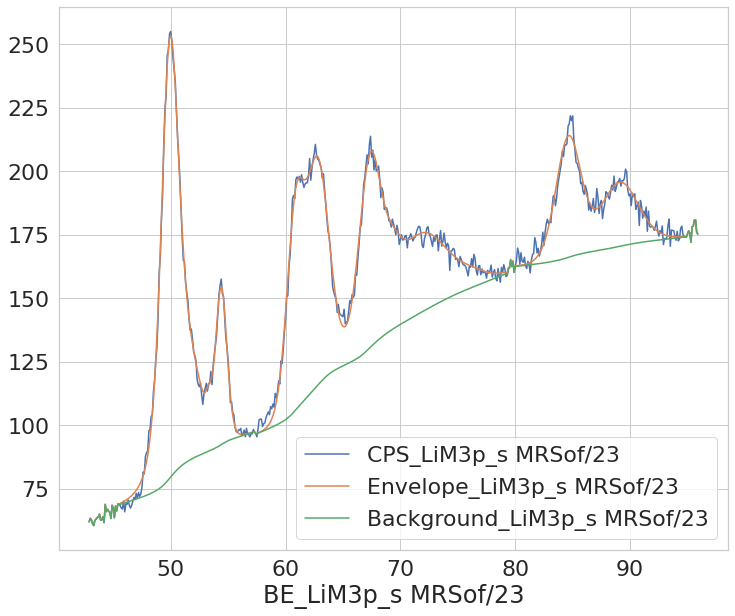

In [6]:
(ddf.iloc[:,[1,-1,-2]]).plot(figsize=(12, 10), legend=True
        )

<AxesSubplot:xlabel='BE_LiM3p_s MRSof/23'>

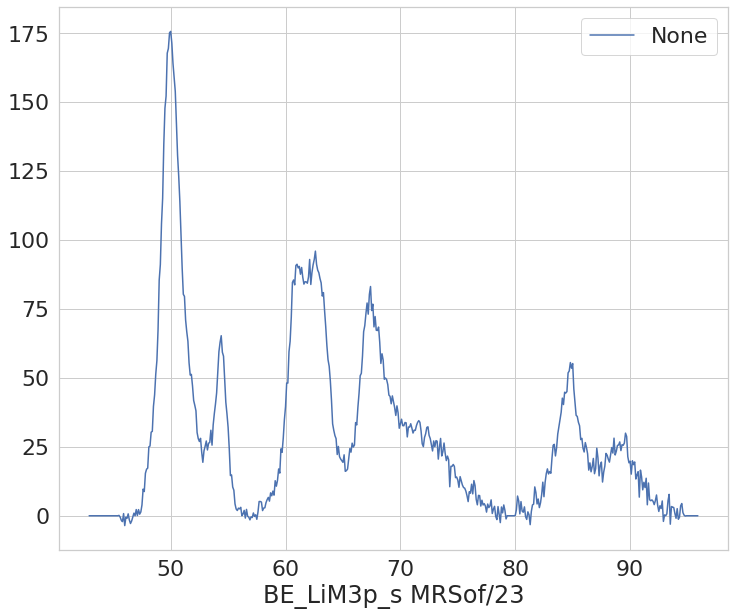

In [7]:
(ddf.iloc[:,1]- ddf.iloc[:,-2]).plot(figsize=(12, 10), legend=True
        )

In [8]:
ddf2=ddf.iloc[:,1]- ddf.iloc[:,-2]

In [14]:
BE=[]
BE=df["BE_LiM3p_s MRSof/23"]

In [15]:
def gaussienne(x,mu,sigma_carre):
    return (1/sqrt(2*pi*sigma_carre)*exp(-1/2*(x-mu)**2/sigma_carre))

In [39]:
G=[]
for i in range (len(BE)):
    y=gaussienne(BE[i], 62, 3)
    G.append(y*400)

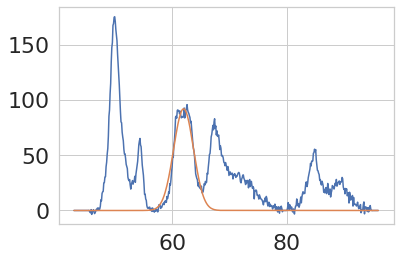

In [40]:
plt.plot(BE,ddf.iloc[:,1]- ddf.iloc[:,-2])
plt.plot(BE,G)

In [ ]:
df = pd.read_csv(
    "Amiens Lirich-NMC 02-Li-ric-pristine-26062014 Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "ANR Int 5V electrode reference LNM Metaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Barboux Lirich-NMC SD100-01072016 Métaux3p-Li1s.TXT", 
    sep="\t",
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMC1--TEST140-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMC-brut-080212-fi-nouvelle-detection-kratos Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Nath NMCTEST79-fit Métaux3p-Li1s.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df

In [ ]:
df = pd.read_csv(
    "Thèse Adrien AS11 electrode FIT Silouhette AMIENS2014.TXT", 
    sep="\t",
    encoding = 'mbcs',
    skiprows=3,
)

In [ ]:
df